## Selección de keywords aplicando Term Frequency

In [1]:
#Se importan las librerías que serán utilizadas a lo largo de los análisis
from pymongo import MongoClient
import pandas as pd
import spacy
import re
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np

El dataset que se va a utilizar contiene los tweets que fueron generados por los usuarios de la red social Twitter y se guardaron en una base de datos no relacional (MongoDB). MongoDB almacena datos en documentos flexibles similares a JSON, con un formato denominado BSON. A continuación nos conectaremos con el servidor alojado en nuestra computadora particular y buscaremos el dataset y colecciones pertinentes.

In [2]:
client = MongoClient('localhost', port=27017)

In [3]:
#para ver las bases que tengo en mongodb
print(client.list_database_names())

['admin', 'argentina', 'config', 'cordoba', 'keyword_obesidad', 'local', 'twitter_obesidad', 'twitter_obesidad_abril']


Primero se nombrará el dataset a utilizar bajo el nombre "data". El mismo contiene tweets que fueron recolectados durante el mes de mayo de 2021. Estos tweets fueron recolectados teniendo en cuenta palabras clave relacionadas a la temática de obesidad. Las mismas fueron obesidad, obeso y obesa, las cuales serán denominadas a partir de ahora como palabras semilla. 

In [4]:
db = client.twitter_obesidad
print(db.collection_names)
collection = db.mayo

<bound method Database.collection_names of Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'twitter_obesidad')>


In [5]:
#Se transforma en dataframe
data = pd.DataFrame(list(collection.find()))

Se decidió eliminar aquellos tweets en el dataset que tenían en la columna localidad algún país de habla hispana diferente a Argentina. Para ello los fuimos nombrando y eliminando. Si bien esto no descarta al 100% los tweets con localización en otros paises lo hicimos para controlar en la mayor medida la aparición de palabras que no son utilizadas en la jerga argentina.
Luego, a partir del dataset "data", se generan 3 datasets denominados "data_obeso", "data_obesa" y "data_obesidad", donde cada uno contiene las palabras semillas: 'obeso', 'obesa' y 'obesidad', respectivamente. Este procedimiento se llevó a cabo con el objetivo de diferenciar cada una de estas palabras semilla para encontrar los términos más frecuentemente relacionados a cada una de ellas.

In [6]:
data = data.drop(data[data['location'].str.lower().str.contains('peru|perú|bolivia|paraguay|uruguay|ecuador|mexico\
|colombia|venezuela|brasil|chile|españa|spain|mejico|costa rica|puerto rico|guatemala\
|nicaragua|panama|panamá|méxico|europa|brazil|barcelona|barranquilla|madrid')==True].index)

data_obeso = data[data['tweet'].str.lower().str.contains('obeso')==True]
data_obesa = data[data['tweet'].str.lower().str.contains('obesa')==True]
data_obesidad = data[data['tweet'].str.lower().str.contains('obesidad')==True]


print('Tweets que forman el dataset incluyendo la palabra obeso:',(data_obeso.shape))
print('---------------------------------------------------------')
print('Tweets que forman el dataset incluyendo la palabra obesa:',(data_obesa.shape))
print('---------------------------------------------------------')
print('Tweets que forman el dataset incluyendo la palabra obesidad:',(data_obesidad.shape))


Tweets que forman el dataset incluyendo la palabra obeso: (2911, 10)
---------------------------------------------------------
Tweets que forman el dataset incluyendo la palabra obesa: (923, 10)
---------------------------------------------------------
Tweets que forman el dataset incluyendo la palabra obesidad: (3747, 10)


In [7]:
#Se crea una nueva variable para clasificar los datasets por temática y no confundirlos una vez que se unan los mismos.
data_obesidad['tema'] = 'obesidad'
data_obeso['tema'] = 'obeso'
data_obesa['tema'] = 'obesa'

C:\Users\Eugenia\Miniconda3v1\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Eugenia\Miniconda3v1\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Eugenia\Miniconda3v1\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Ahora se procederá a realizar el preoprocesamiento del texto de los tweets, el cual consiste en eliminar los caracteres especiales, números, urls, usernames, entre otros. Acto seguido se tokenizarán los tweets y obtendrá un nuevo texto.

In [8]:
def limpiar_tokenizar(texto):

    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    #Eliminación de los nombres de usuarios
    nuevo_texto = re.sub('@[A-Za-z0-9]+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub('\d+', ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub('\\s+', ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)

print(limpiar_tokenizar(texto=str(data_obeso['tweet'])))

['mi', 'más', 'fácil', 'preguntale', 'él', 'rt', 'porqué', 'no', 'me', 'sorpr', 'su', 'voz', 'es', 'insoportable', 'su', 'cara', 'se', 'rt', 'reagann', 'analista', 'todos', 'hablan', 'rt', 'omega', 'con', 'los', 'ancianos', 'vacuna', 'rt', 'niños', 'adolescentes', 'jóven', 'todavía', 'no', 'me', 'tiene', 'sentido', 'como', 'un', 'secretario', 'lo', 'que', 'no', 'te', 'gusta', 'so', 'rt', 'los', 'obesos', 'conmebol', 'nos', 'man', 'name', 'tweet', 'length', 'dtype', 'object']


In [9]:
# Se aplica la función de limpieza y tokenización a cada tweet generando una nueva variable con el texto nuevo

data_obeso['texto_tokenizado'] = data_obeso['tweet'].apply(lambda x: limpiar_tokenizar(x))
data_obesa['texto_tokenizado'] = data_obesa['tweet'].apply(lambda x: limpiar_tokenizar(x))
data_obesidad['texto_tokenizado'] = data_obesidad['tweet'].apply(lambda x: limpiar_tokenizar(x))

C:\Users\Eugenia\Miniconda3v1\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Eugenia\Miniconda3v1\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Eugenia\Miniconda3v1\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is

In [10]:
# Se unen los dos dataframes en uno solo
tweets = pd.concat([data_obeso, data_obesa, data_obesidad], ignore_index=True)
tweets.shape

(7581, 12)

A continuación se aplica la función UNNEST, la cual devuelve una tabla de resultados que incluye una fila para cada elemento de la matriz especificada (token). Si se han especificado varios argumentos de matriz común, el número de filas coincidirá con la matriz que tenga la cardinalidad más alta.

In [11]:
# Unnest de la columna texto_tokenizado

tweets_tidy = tweets.explode(column='texto_tokenizado')
tweets_tidy = tweets_tidy.drop(columns='tweet')
tweets_tidy = tweets_tidy.rename(columns={'texto_tokenizado':'token'})
tweets_tidy.head()

,_id,user_id,username,location,coordinates,fecha_creacion,idioma,sentimiento,retweeted,tema,token
0,60912d50cf20bc8b0980961f,1185404921950007297,Augusto,"Monterrey, Nuevo León",None,2021-05-04 11:17:30,es,,NaN,obeso,mi
0,60912d50cf20bc8b0980961f,1185404921950007297,Augusto,"Monterrey, Nuevo León",None,2021-05-04 11:17:30,es,,NaN,obeso,me
0,60912d50cf20bc8b0980961f,1185404921950007297,Augusto,"Monterrey, Nuevo León",None,2021-05-04 11:17:30,es,,NaN,obeso,vino
0,60912d50cf20bc8b0980961f,1185404921950007297,Augusto,"Monterrey, Nuevo León",None,2021-05-04 11:17:30,es,,NaN,obeso,ebrard
0,60912d50cf20bc8b0980961f,1185404921950007297,Augusto,"Monterrey, Nuevo León",None,2021-05-04 11:17:30,es,,NaN,obeso,nl


In [12]:
# Palabras totales utilizadas por cada temática

print('--------------------------')
print('Palabras totales por tema')
print('--------------------------')
tweets_tidy.groupby(by='tema')['token'].count()

--------------------------
Palabras totales por tema
--------------------------


tema
obesa       12314
obesidad    59570
obeso       45962
Name: token, dtype: int64

In [13]:
# Palabras que son distintas utilizadas por cada temática

print('----------------------------')
print('Palabras distintas por tema')
print('----------------------------')
tweets_tidy.groupby(by='tema')['token'].nunique()

----------------------------
Palabras distintas por tema
----------------------------


tema
obesa       2911
obesidad    6029
obeso       5271
Name: token, dtype: int64

In [14]:
# Top 5 palabras más utilizadas por cada temática

tweets_tidy.groupby(['tema','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('tema') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))

tema     token  count
tema                                     
obesa    1799      obesa     obesa    756
         625       obesa        de    505
         2171      obesa       que    423
         1399      obesa        la    388
         1773      obesa        no    292
obesidad 6752   obesidad  obesidad   3657
         4317   obesidad        de   3566
         5986   obesidad        la   2916
         7757   obesidad        rt   2017
         7482   obesidad       que   1661
obeso    12233     obeso     obeso   2399
         12932     obeso       que   1803
         10131     obeso        de   1524
         13197     obeso        rt   1468
         10488     obeso        el   1176

Como podemos observar aún forman parte de los textos las stopwords, por lo cual en los próximos comandos las eliminaremos

In [15]:
# Obtención de listado de stopwords del español

from nltk.corpus import stopwords
stop_words = list(stopwords.words('spanish'))
# Se añade la stoprword: rt al igual que las palabras semilla
stop_words.extend(('rt','obeso','obesa', 'obesidad', 'si', 'así', 'cali', 'vista', 'cañas'))
print(stop_words[:10])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


In [16]:
# Se realiza un filtrado para excluir stopwords
tweets_tidy = tweets_tidy[~(tweets_tidy["token"].isin(stop_words))]

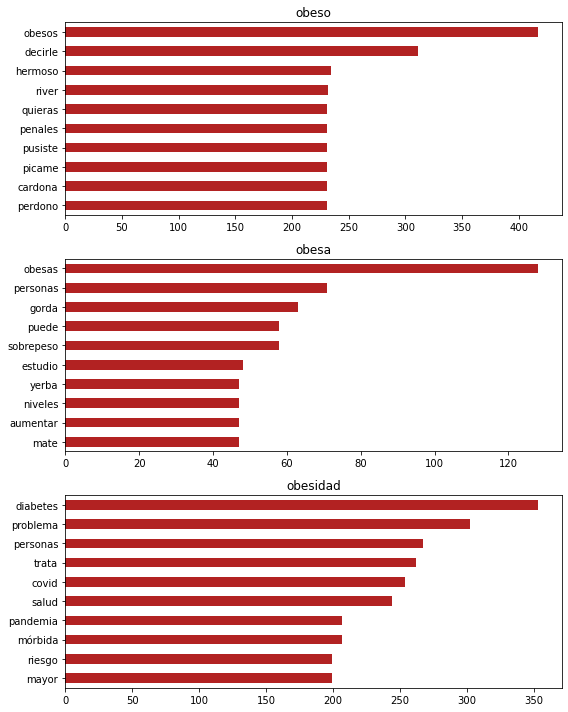

In [17]:
# Top 10 palabras por temática (sin stopwords)

fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(8, 10))
for i, tema in enumerate(tweets_tidy.tema.unique()):
    df_temp = tweets_tidy[tweets_tidy.tema == tema]
    counts  = df_temp['token'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(tema)

fig.tight_layout()

### TOP 10 palabras

#### OBESO: obesos, decirle, hermoso, river, quieras, penales, pusiste, picame, cardona, perdono.

Entre las palabras más frecuentemente utilizadas en los tweets donde se contenía la palabra obeso se puede observar que aparece la palabra obesos (plural), siendo una flexión de la palabra semilla. El resto de las palabras, contrario a como era de esperarse, no guardan ningún tipo de relación con la palabra semilla. Existen algunas hipótesis en relación al subconjunto "river, penales, cardona" que serán abordados en el apartado de "Conclusiones/datos curiosos", sin embargo para el resto no se encuentra explicación acorde.

#### OBESA: obesas, persona, gorda, puede, sobrepeso, estudio, yerba, niveles, aumentar, mate.

#### OBESIDAD: diabetes, problema, personas, trata, covid, salud, pandemia, mórbida, riesgo, mayor.

Entre las palabras más frecuentes utilizadas en tweets donde se contenía la palabra obesa y obesidad observamos la palabra persona, gorda, sobrepeso, niveles, estudio, diabetes, problema, covid, salud, pandemia, mórbida y riesgo, las cuales están más relacionadas desde un ámbito de la salud en relación a la temática.

 
Estas palabras son interesantes de analizar e indagar el por qué son frecuentemente utilizadas en tweets donde también se habla de obesidad, obeso y obesa. Sin embargo, es a partir de estos resultados que podemos explicar el por qué esta técnica de "Term Frequency" no es la más adecuada para obtener keywords que nos permitan recolectar tweets relacionados a la temática de obesidad. Nuestras principales conclusiones serán profundizadas en el apartado c) conclusiones.
